# Temperature dependence

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Function for $F_d$ and D fit

In [2]:
def pared(fd, D):
    a1 = 2.53
    b1 = 0.606
    c1 = 4.27
    d1 = 0.45
    def A(D):
        return a1 * np.exp(-b1*(D-c1)) + d1
    
    def B(D):
        return 3.08
    
    def C(D):
        return 0.932
    
    a4 = 38.431
    b4 = 0.09157
    c4 = 0.75734
    h4 = 17.9118
    def L(D):
        return a4 * np.exp(-b4*D) * np.log(c4*D) + h4
    
    a5 = 1.78
    b5 = 0.59
    c5 = 2.14
    d5 = 1.15
    def M(D):
        return a5 * np.exp(-b5*(D-c5)) + d5
    
    b6 = 2.04
    c6 = 2.95
    k6 = 0.24
    def N(D):
        return c6 * (b6 - np.exp(-k6*D))
    
    return A(D) / (1 + np.exp(-B(D) * (fd - C(D)))) \
        + L(D) / (1 + np.exp(-M(D) * (fd - N(D))))

# Visualization

In [3]:
jar = pd.read_csv('fuel_swelling_5-grains_no-fitting.csv')

In [4]:
fd = 'Fission Density (10^21 f/cm3)'
gs = 'Grain Size (um)'
fr = 'Fission Rate (10^14 f/cm3/s)'
fgs = 'Fuel Gas Swelling (%)'
ct = 'Coolant init Temp (C)'

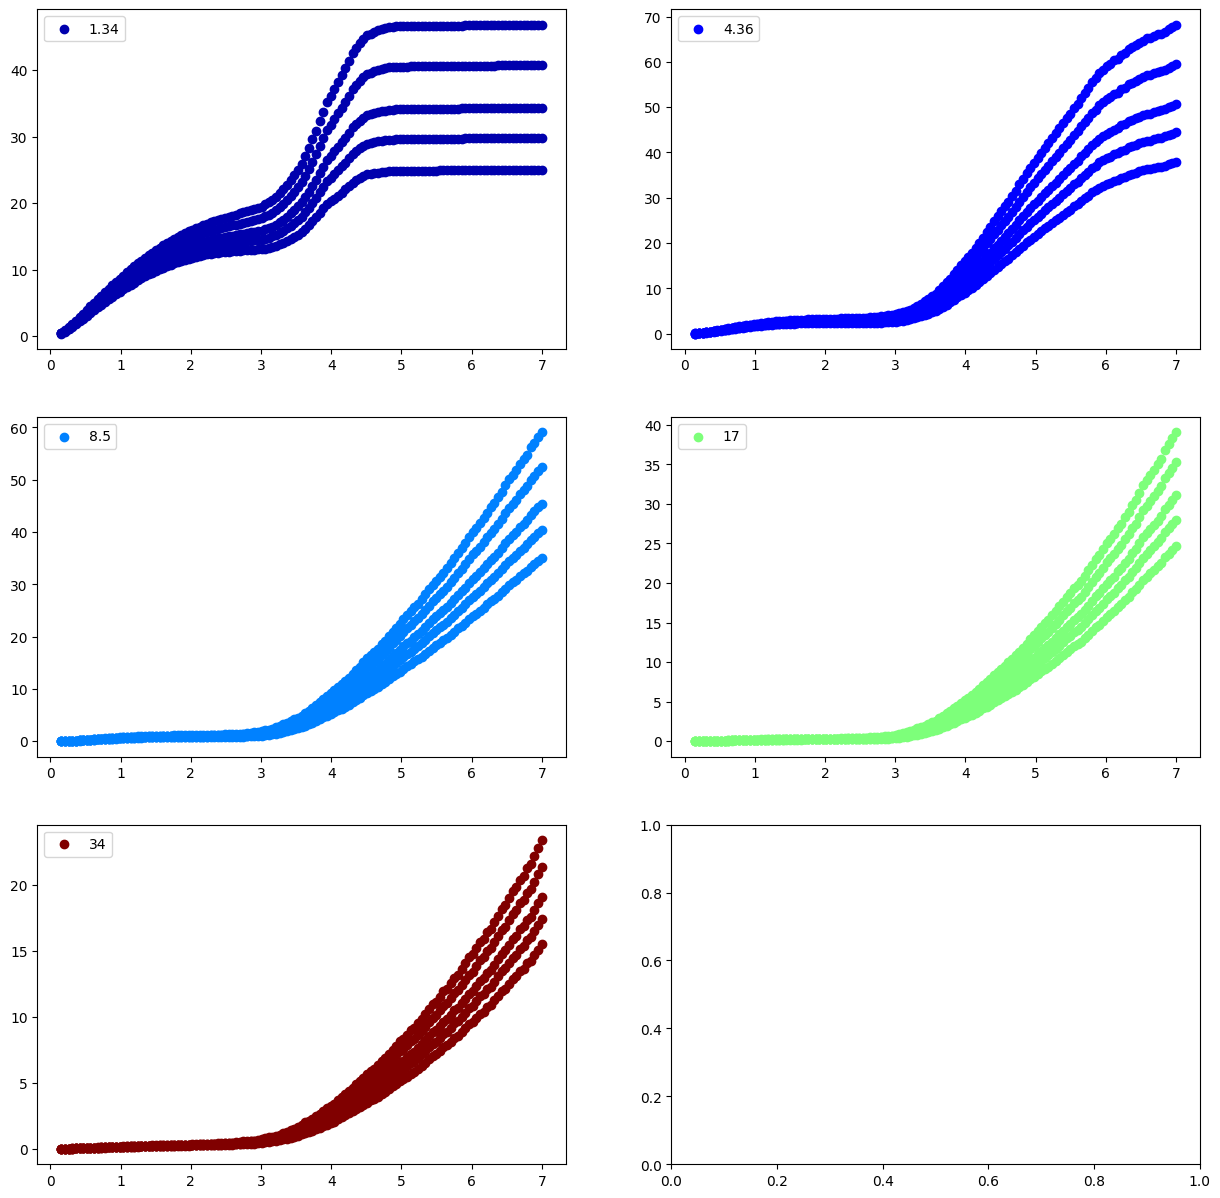

In [5]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))

for i, G in zip(range(5), [1.34, 4.36, 8.5, 17, 34]):
    foo = jar.loc[(jar[fr] == 6) & (jar[gs] == G)]
    axs[i//2, i%2].scatter(foo[fd], foo[fgs], color=plt.cm.jet(G/34), label=f'{G}')
    axs[i//2, i%2].legend()
    
plt.show()

# Is this the end?

In [6]:
def test(X, m):
    fd, D, T = X
    return pared(fd, D) * (m * (T-88) + 1)

In [7]:
tra = jar.loc[jar[fr] == 6]
tra

,Grain-size-ratio index,Grain Size (um),Operation Days,Heat Flux (W/cm2),Fission Rate (10^14 f/cm3/s),Coolant init Temp (C),Fuel Temp (C),Fission Density (10^21 f/cm3),Fuel Swelling (%),Fuel Gas Swelling (%)
582,1,1.34,3,240.0,6,60,122.617135,0.15552,1.024193,0.402113
583,1,1.34,4,240.0,6,60,122.654087,0.20736,1.534222,0.704782
584,1,1.34,5,240.0,6,60,122.757977,0.25920,2.095126,1.058326
585,1,1.34,6,240.0,6,60,122.808141,0.31104,2.683748,1.439588
586,1,1.34,7,240.0,6,60,122.860988,0.36288,3.289313,1.837793
...,...,...,...,...,...,...,...,...,...,...
22563,5,34.00,131,240.0,6,120,175.120699,6.79104,48.419218,21.255058
22564,5,34.00,132,240.0,6,120,175.217068,6.84288,48.937525,21.566005
22565,5,34.00,133,240.0,6,120,175.267093,6.89472,49.739980,22.161100
22566,5,34.00,134,240.0,6,120,175.366223,6.94656,50.550882,22.764642


In [8]:
popt, pcov = curve_fit(test, (tra[fd], tra[gs], tra[ct]), tra[fgs])
popt

array([0.00951745])

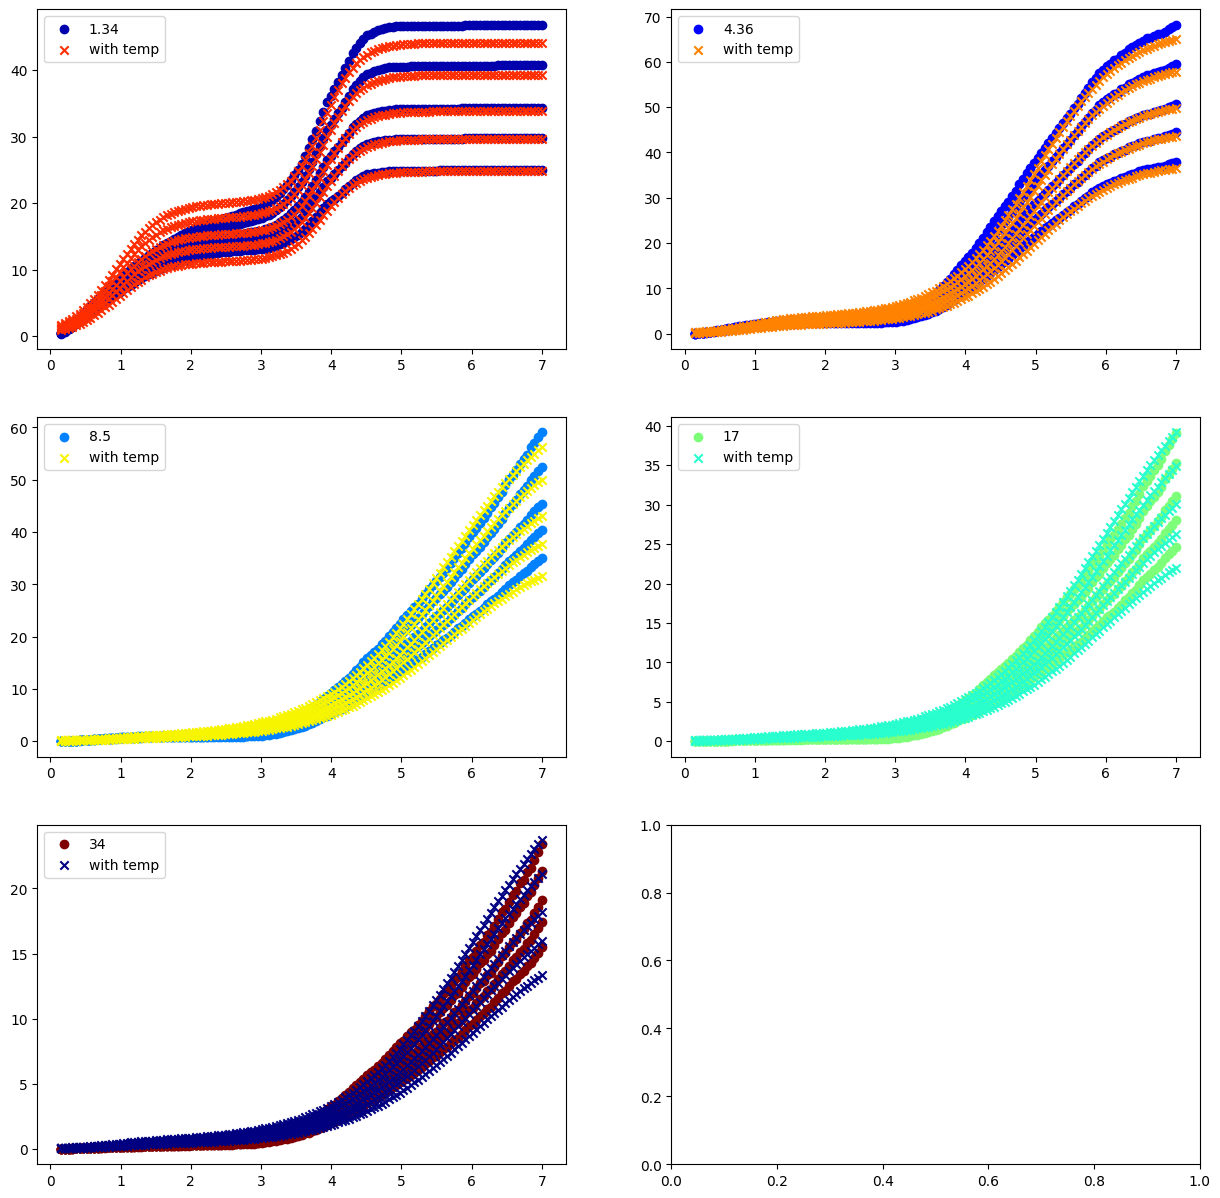

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))

for i, G in zip(range(5), [1.34, 4.36, 8.5, 17, 34]):
    foo = jar.loc[(jar[fr] == 6) & (jar[gs] == G)]
    axs[i//2, i%2].scatter(foo[fd], foo[fgs], color=plt.cm.jet(G/34), label=f'{G}')
    pred = test((foo[fd], foo[gs], foo[ct]), 0.00951745)
    axs[i//2, i%2].scatter(foo[fd], pred, marker='x', color=plt.cm.jet(0.9-G/34), label='with temp')
    axs[i//2, i%2].legend()
    
plt.show()

**The sampled fission rates and coolant inlet temperatures are both equally spaced. No wonder that the results are eerily similar.**